In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-q2dm428k
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-q2dm428k
  Resolved https://github.com/tensorflow/docs to commit bbc0b9c70fc0bd4411793d1b0bcc56ef1dbc2405
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.11.18.43811-py3-none-any.whl size=182608 sha256=3515a75e676184c0b7008b8e72afb32e656a64a10234d4bd3b3ad034f35049ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-p2c9prpk/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
from absl import logging

import imageio
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
#tf.random.set_seed(1)

import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import time

try:
  from google.colab import files
except ImportError:
  pass

from IPython import display
from skimage import transform


In [ ]:
progan = hub.load("https://kaggle.com/models/google/progan-128/tensorflow1/progan-128/1").signatures["default"]

In [ ]:
input_shape = progan.inputs[0]
print("Expected input shape:", input_shape)

Expected input shape: Tensor("input:0", shape=(None, 512), dtype=float32)


Si progan a été chargé avec tf.saved_model.load, il peut contenir des signatures qui définissent les fonctions d’entrée et de sortie du modèle. Essaye ceci :

print(progan.signatures)

Regarde si une des signatures (comme serving_default) contient des informations sur la forme d’entrée.

In [ ]:
print(progan.signatures)

_SignatureMap({'default': <ConcreteFunction () -> Dict[['default', TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None)]] at 0x7CD22AC0FA60>})


In [ ]:
# Dimension du vecteur latent (exemple typique, adapte selon ton modèle)
latent_dim = 512
# Générer un vecteur aléatoire
random_input = tf.random.normal([1,latent_dim])
# Générer une image avec progan
random_image = progan(random_input)["default"][0]
random_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

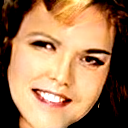

In [ ]:
# Simple way to display an image.
def display_image(image):
  image = tf.constant(image)
  image = tf.image.convert_image_dtype(image, tf.uint8)
  return PIL.Image.fromarray(image.numpy())

display_image(random_image)

In [ ]:
tf.norm(random_input)

<tf.Tensor: shape=(), dtype=float32, numpy=22.375484>